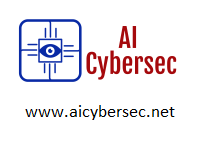
# Hypothesis Testing and ANOVA

### Read in the housing data (code provided).

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
from sklearn.datasets import load_boston

data_boston = load_boston()
data = pd.DataFrame(data_boston.data,columns=data_boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
data.shape

(506, 13)

In [19]:
boston_data = load_boston()
data_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
data_boston['MEDV'] = pd.Series(boston_data.target)
data_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
data_boston.shape

(506, 14)

In [24]:
print(data_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Find the mean, standard deviation, and the standard error of the mean for variable `AGE` using format

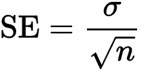

In [25]:
print("Mean:\t\t\t {:.4f}.".format(data['AGE'].mean()))
print("Standard deviation:\t {:.4f}.".format(data['AGE'].std()))
print("Standard error:\t\t {:.4f}.".format(data['AGE'].std()/(len(data['AGE']))**0.5))

# print("Standard Error:\t {:.4f}.".format(data['AGE'].sem()))

Mean:			 68.5749.
Standard deviation:	 28.1489.
Standard error:		 1.2514.


In [66]:
# sem is the standard error of the mean

# scipy standard error function
from scipy.stats import sem
sem(data['AGE'])

1.2513695252583041

In [67]:
x="{:.4f}".format(10.1234567890)
x

'10.1235'

In [68]:
print(x)

10.1235


In [69]:
"{:.5e}".format(0.1234567890)

'1.23457e-01'

In [70]:
"{:.1%} of programmers prefer Python".format(0.473726)

'47.4% of programmers prefer Python'

#### Date Formatting

In [14]:
d = datetime.datetime(2010, 7, 4, 12, 15, 58)
'{:%Y-%m-%d %H:%M:%S}'.format(d)
'{}'.format(d.strftime('%Y-%m-%d %H:%M:%S'))

'2010-07-04 12:15:58'

### For the variable `NOX`, test the hypothesis that the mean is equal to the median. 

You may use scipy functions to complete this, but complete all steps listed below.

1. Define hypothesis
2. Set alpha (let alpha = 0.05)
3. Calculate point estimate
4. Calculate test statistic
5. Find the p-value
6. Interpret results

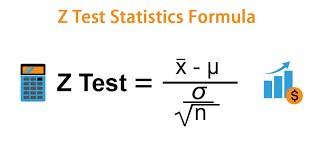

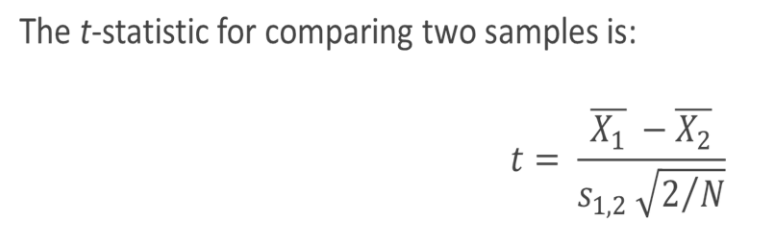

In [86]:
# Question : Test the hypothesis that the mean is equal to the median


### Step 1: Define hypoteses

### H_0: mu_NOX = M_NOX
### H_A: mu_NOX != M_NOX

## Step 2: alpha = 0.05 (p-value)

# Alpha risk is the risk in a statistical test of rejecting a null hypothesis when it is actually true

alpha = 0.05

## Step 3: Calculate point estimate.
sample_mean = NOX.mean()
sample_median = NOX.median()
sample_std = NOX.std()

sample_size = len(NOX)

## Step 4: Calculate test statistic.
t_statistic = (sample_mean - sample_median)/(sample_std/sample_size**0.5)

## Step 5: Find p-value..


# the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test.

## Python scipy.stats.t.sf()
## (proportion of values at least as extreme as.t.sf

from scipy.stats import t # t.sf student test (sf: survival function)

p_value = t.sf(np.abs(t_statistic), len(NOX)-1) * 2 


## Because our alternative hypothesis is != (rather than greater than or less than),
## we multiply our p-value by 2. (This is called a two-sided test.)
print("Our sample median is {:.4f}.".format(NOX.median()))
print("Our sample mean is {:.4f}.".format(sample_mean))
print("Our t-statistic is {:.6f}.".format(t_statistic))
print("Our p-value is {:.6f}.".format(p_value))

if p_value < alpha:
    print("We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.")
elif p_value > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that the true mean NOX value is different from the median .")
else:
    print("Our test is inconclusive.")

Our sample median is 0.5380.
Our sample mean is 0.5547.
Our t-statistic is 3.240884.
Our p-value is 0.001270.
We reject our null hypothesis and conclude that the true mean NOX value is different from the median NOX value.


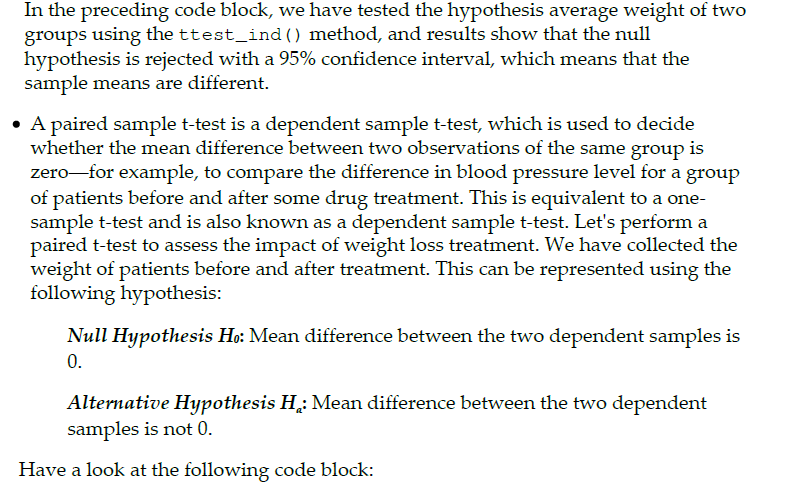

In [90]:
####################################### 2-sample t-test #########################################

from scipy.stats import ttest_ind                   # T-test for the means of two independent samples of scores.

# Calculates the T-test for the means of TWO INDEPENDENT samples of scores. 
# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values

import numpy as np

data1=np.array([63, 75, 84, 58, 52, 96, 63, 55, 76, 83])

data2=np.array([53, 43, 31, 113, 33, 57, 27, 23, 24, 43])

# Compare samples

stat, p = ttest_ind(data1, data2)

print("p-values:",p)

print("t-test:",stat)

# 0.05 or 5% is significance level or alpha.

if p  < 0.05:    

    print("Hypothesis Rejected")

else:

    print("Hypothesis Accepted")    

p-values: 0.015170931362451255
t-test: 2.6835879913819185
Hypothesis Rejected


In [93]:
############################################ paired test ##########################################

# A paired t-test is used when we are interested in the difference between two variables for the same subject.

from scipy.stats import ttest_rel  # Calculate the t-test on TWO RELATED samples of scores, a and b

# Weights before treatment
data1=np.array([63, 75, 84, 58, 52, 96, 63, 65, 76, 83])


# Weights after treatment
data2=np.array([53, 43, 67, 59, 48, 57, 65, 58, 64, 72])

# Compare weights

stat, p = ttest_rel(data1, data2)

print("p-values:",p)

print("t-test:",stat)

# 0.05 or 5% is the significance level or alpha.

if p  < 0.05:    
    
    print("Hypothesis Rejected")

else:

    print("Hypothesis Accepted")

p-values: 0.013685575312467715
t-test: 3.0548295044306903
Hypothesis Rejected


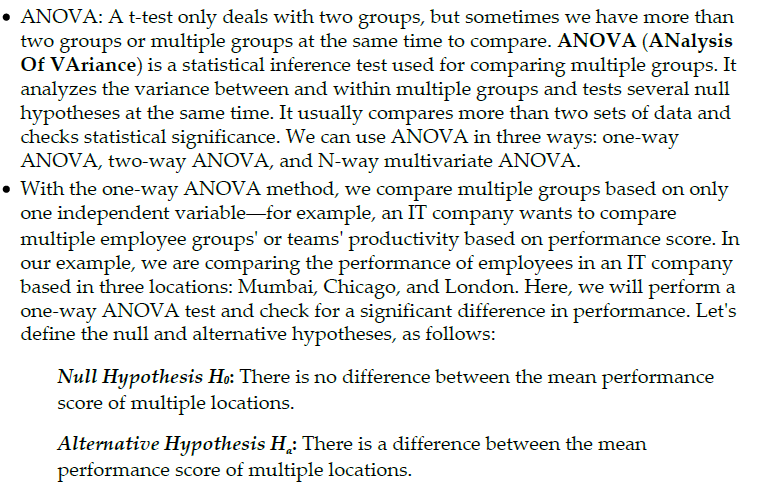

In [94]:
########################################## One-Way ANOVA ##############################################

from scipy.stats import f_oneway 
# The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
# The test is applied to samples from two or more groups, possibly with differing sizes.

# In this code block, we have created three lists of employee performance
# scores for three locations: Mumbai, Chicago, and London.
# Let's perform a one-way ANOVA test, as follows:


# Performance scores of Mumbai location
mumbai=[0.14730927, 0.59168541, 0.85677052, 0.27315387, 0.78591207,0.52426114, 0.05007655, 0.64405363, 0.9825853 , 0.62667439]

# Performance scores of Chicago location
chicago=[0.99140754, 0.76960782, 0.51370154, 0.85041028, 0.19485391,0.25269917, 0.19925735, 0.80048387, 0.98381235, 0.5864963 ]

# Performance scores of London location
london=[0.40382226, 0.51613408, 0.39374473, 0.0689976 , 0.28035865,0.56326686, 0.66735357, 0.06786065, 0.21013306, 0.86503358]

# In the preceding code block, we have created three lists of employee performance
# scores for three locations: Mumbai, Chicago, and London.

# Let's perform a one-way ANOVA test, as follows:


# Compare results using Oneway ANOVA
stat, p = f_oneway(mumbai, chicago, london)

print("p-values:", p)

print("t-test:", stat)


if p  < 0.05:    
    
    print("Hypothesis Rejected")

else:

    print("Hypothesis Accepted")

p-values: 0.27667556390705783
t-test: 1.3480446381965452
Hypothesis Accepted


In [ ]:
# Do the same for "Age", test the hypothesis that "Mean" > "Median"

In [ ]:
# Performance of company A, B and C

# -Null Hypothesis: The null hypothesis states that the mean of all groups is equal
# -Alternative Hypothesis: The alternative hypothesis states that at least one of the means is different,

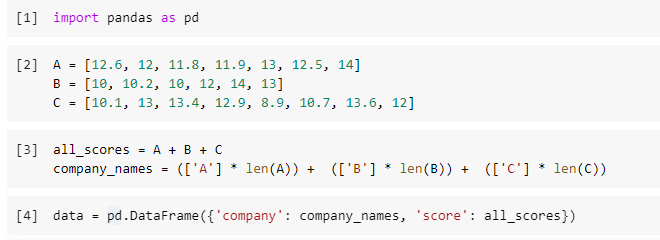